In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_confounders=2)
# sample parameters from positive truncated N(1, 0.1)
mu=1; phi=0.1
sim.generate_params(rand_fn_loc=lambda size: mu + scipy.stats.truncnorm.rvs(-mu / phi, np.infty, scale=phi, size=size))
sim.generate_data()

# count data
X = sim.X
# sample description
sample_description = sim.sample_description

The sample description should be a pandas DataFrame with `num_observations` rows.
Each column should represent a property of the dataset.

The module `batchglm.api.data` contains some helper functions which can be useful to create this sample description:

- `sample_description_from_anndata()`
- `sample_description_from_xarray()`

In [3]:
sample_description.iloc[:10,:]

,condition
observations,
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0


# Run differential expression test:

The wilcoxon test checks if two groups of samples differ significantly in one gene.

Therefore, it has to be provided with a parameter `grouping` which specifies the group membership of each sample.
It can be either the name of a column in `sample_description` or a vector of length `num_observations`.


In [4]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy.api as de

test = de.test.wilcoxon(
    data=X,
    grouping="condition",
    sample_description=sample_description
)


# Obtaining the results

The p-/q-values can be obtained by calling test.pval / test.qval:

In [5]:
test.qval

array([1.13117243e-02, 3.83449700e-08, 1.43474808e-01, 2.42289237e-03,
       1.69406759e-06, 1.77588676e-05, 2.59397504e-01, 3.68092203e-01,
       2.54665417e-03, 3.41245896e-02, 3.53842780e-01, 2.31095917e-01,
       1.67751715e-09, 5.70841556e-03, 3.03002642e-01, 2.77057240e-07,
       7.97569771e-01, 4.35645788e-01, 2.59397504e-01, 1.89862437e-05,
       6.34275557e-01, 7.22017834e-02, 2.03018732e-02, 3.58774919e-01,
       7.21092937e-11, 7.97569771e-01, 4.05527096e-03, 3.18573874e-03,
       1.12036279e-07, 8.66641733e-02, 5.86104557e-01, 1.95451481e-07,
       7.97569771e-01, 8.74870818e-02, 2.54381206e-03, 4.94393548e-03,
       8.31840735e-01, 2.13051639e-03, 7.92320425e-19, 1.00436873e-07,
       9.56828884e-18, 1.49810494e-01, 4.29162241e-01, 2.18416439e-10,
       1.67772426e-09, 3.67968082e-35, 6.81444304e-01, 8.23693511e-01,
       2.59397504e-01, 3.60404373e-01, 2.71693654e-01, 1.04473846e-14,
       3.61169206e-01, 6.88087728e-05, 1.17751345e-25, 1.84373230e-17,
      

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [6]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean
0,0,5.768979e-03,1.131172e-02,-0.065629,8155.6290
1,1,9.969692e-09,3.834497e-08,0.109509,1660.2905
2,2,9.612812e-02,1.434748e-01,-0.047769,5359.1945
3,3,1.041844e-03,2.422892e-03,0.099434,63.0085
4,4,5.590423e-07,1.694068e-06,0.065207,1397.6175
5,5,6.393192e-06,1.775887e-05,-0.082856,8011.7850
6,6,1.945481e-01,2.593975e-01,-0.047952,8508.2290
7,7,3.091975e-01,3.680922e-01,-0.019498,9119.4375
8,8,1.145994e-03,2.546654e-03,0.125963,895.8970
9,9,1.910977e-02,3.412459e-02,-0.038616,7185.7295


- `gene`: gene name / identifier
- `pval`: p-value of the gene
- `qval`: multiple testing - corrected p-value of the gene
- `log2fc`: log_2 fold change between `no coefficient` and `coefficient`

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c23592a90>)

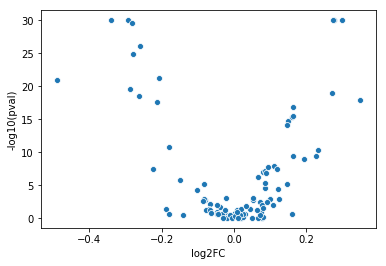

In [7]:
test.plot_volcano()

`plot_vs_ttest()` shows the correlation between t-test p-values and the wald test p-values

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2563ccf8>)

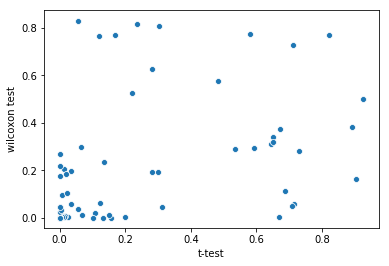

In [8]:
test.plot_vs_ttest()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

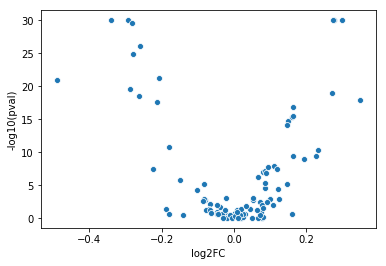

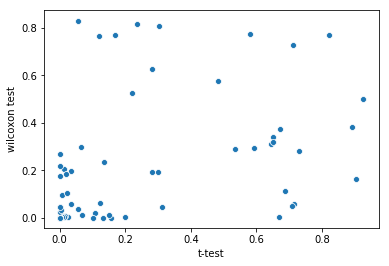

In [9]:
test.plot_diagnostics()